In [1]:
# Imports and housekeeping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import classification_report, roc_auc_score

In [2]:
# Import the main dataset
df = pd.read_csv('churn_clean.csv',dtype={'locationid':np.int64})

In [3]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
# Drops columns with no relevance to the research question
df_data = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng',
                   'Population', 'TimeZone', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie',
                   'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
                   'PaymentMethod', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1)

In [5]:
# Display dataset top 5 rows
df_data.head()

,Area,Job,Children,Age,Income,Marital,Gender,Churn,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,Urban,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,6.795513,172.455519,904.536110
1,Urban,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,1.156681,242.632554,800.982766
2,Urban,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,15.754144,159.947583,2054.706961
3,Suburban,Solicitor,1,48,18925.23,Married,Male,No,17.087227,119.956840,2164.579412
4,Suburban,Medical illustrator,0,83,40074.19,Separated,Male,Yes,1.670972,149.948316,271.493436


In [6]:
# Display data set number of rows and colums
df_data.shape

(10000, 11)

In [7]:
# Check data for null or missing values
df_data.isna().any()

Area                 False
Job                  False
Children             False
Age                  False
Income               False
Marital              False
Gender               False
Churn                False
Tenure               False
MonthlyCharge        False
Bandwidth_GB_Year    False
dtype: bool

In [8]:
# Check data for duplicated rows
df_data.duplicated().sum()

0

In [9]:
# Display summary statistics for dataset - continuous variables
df_data.describe()

,Children,Age,Income,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,34.526188,172.624816,3392.341550
std,2.1472,20.698882,28199.916702,26.443063,42.943094,2185.294852
min,0.0000,18.000000,348.670000,1.000259,79.978860,155.506715
25%,0.0000,35.000000,19224.717500,7.917694,139.979239,1236.470827
50%,1.0000,53.000000,33170.605000,35.430507,167.484700,3279.536903
75%,3.0000,71.000000,53246.170000,61.479795,200.734725,5586.141370
max,10.0000,89.000000,258900.700000,71.999280,290.160419,7158.981530


In [10]:
# Display summary statistics for dataset - categorical variables
df_data.describe(include = object)

,Area,Job,Marital,Gender,Churn
count,10000,10000,10000,10000,10000
unique,3,639,5,3,2
top,Suburban,Occupational psychologist,Divorced,Female,No
freq,3346,30,2092,5025,7350


In [11]:
# Too many unique values, drop Job column
df_data = df_data.drop(['Job'], axis=1)

In [12]:
# Display summary statistics for dataset - categorical variables
df_data.describe(include = object)

,Area,Marital,Gender,Churn
count,10000,10000,10000,10000
unique,3,5,3,2
top,Suburban,Divorced,Female,No
freq,3346,2092,5025,7350


In [13]:
# Convert categorical variables (excluding Churn) to numeric via pd.get_dummies
df_data = pd.get_dummies(df_data, columns = ['Area', 'Marital', 'Gender'], dtype = int)

In [14]:
# Display dataset info
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Children               10000 non-null  int64  
 1   Age                    10000 non-null  int64  
 2   Income                 10000 non-null  float64
 3   Churn                  10000 non-null  object 
 4   Tenure                 10000 non-null  float64
 5   MonthlyCharge          10000 non-null  float64
 6   Bandwidth_GB_Year      10000 non-null  float64
 7   Area_Rural             10000 non-null  int64  
 8   Area_Suburban          10000 non-null  int64  
 9   Area_Urban             10000 non-null  int64  
 10  Marital_Divorced       10000 non-null  int64  
 11  Marital_Married        10000 non-null  int64  
 12  Marital_Never Married  10000 non-null  int64  
 13  Marital_Separated      10000 non-null  int64  
 14  Marital_Widowed        10000 non-null  int64  
 15  Gen

In [15]:
# Export prepared dataframe to CSV
df_data.to_csv(r'/home/wstults/anaconda3/Jupyter/d209/churn_clean_perpared.csv')

In [16]:
# Generate train/test split
y = df_data['Churn'].values
X = df_data.drop('Churn', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=21, stratify=y)

In [17]:
# Create dataframes from train/test splits and export as CSV
X_train_data = pd.DataFrame(data = X_train)
X_train_data.to_csv(r'/home/wstults/anaconda3/Jupyter/d209/X_train.csv')
X_test_data = pd.DataFrame(data = X_test)
X_test_data.to_csv(r'/home/wstults/anaconda3/Jupyter/d209/X_test.csv')
y_train_data = pd.DataFrame(data = y_train)
y_train_data.to_csv(r'/home/wstults/anaconda3/Jupyter/d209/y_train.csv')
y_test_data = pd.DataFrame(data = y_test)
y_test_data.to_csv(r'/home/wstults/anaconda3/Jupyter/d209/y_test.csv')

In [18]:
# Set up pipeline with StandardScaler and knn
steps = [('scaler', StandardScaler()),('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
# Define parameters and set up Gridsearch
parameters = {'knn__n_neighbors': np.arange(1, 50)}
cv = GridSearchCV(pipeline, param_grid=parameters)
# Fit Gridsearch and run predictions
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
# Print results
print(cv.best_params_)
print(cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))

{'knn__n_neighbors': 25}
0.8104
              precision    recall  f1-score   support

          No       0.83      0.93      0.88      1837
         Yes       0.71      0.48      0.57       663

    accuracy                           0.81      2500
   macro avg       0.77      0.71      0.73      2500
weighted avg       0.80      0.81      0.80      2500



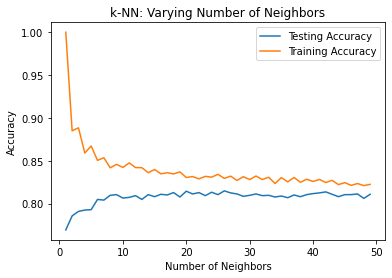

In [19]:
# Setup arrays for knn values and to store train and test accuracies
neighbors = np.arange(1, 50)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors and pipeline with Standard
    knn = KNeighborsClassifier(n_neighbors=k)
    pipe = make_pipeline(StandardScaler(), knn)
    # Fit the pipeline to the training data
    pipe.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = pipe.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = pipe.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [20]:
# Define knn and pipe
knn = KNeighborsClassifier(n_neighbors=25)
pipe = make_pipeline(StandardScaler(), knn)
# fit pipe to model
pipe.fit(X_train, y_train)
# predict probabilities
pred_prob = pipe.predict_proba(X_test)
# generate auc score
auc_score = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score)

0.8621605000611692
